# Group Runtime Terror


<h1 style="color:#189AB4;font-size:60px;"><strong>Company Bankruptcy Prediction <strong style="color:black"></strong></strong></h1>

![](https://www.clevergirlfinance.com/wp-content/uploads/2019/08/bankruptcy.jpg.webp)



###Import Libraries

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap  
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

## Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
import xgboost as xgb

## Model evaluators
from sklearn import datasets, metrics, model_selection
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import PrecisionRecallDisplay

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/company_bankcuption_pridiction.csv.csv")
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


## Inferential Statistics

In [ ]:
df.shape

(6819, 96)

In [ ]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

<h1 style="color:#189AB4;font-size:60px;"><strong>Data </strong> <strong style="color:black">Demographics:</strong></h1>

In [ ]:
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [ ]:
df.duplicated().sum()

0

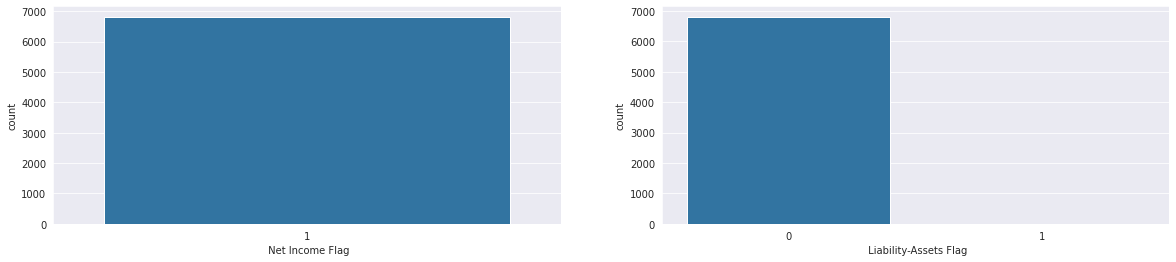

In [ ]:
plt.figure(figsize=(20,4))
#plot 1:

plt.subplot(1, 2, 1)
sns.countplot(x =' Net Income Flag', data = df)

#plot 2:

plt.subplot(1, 2, 2)
sns.countplot(x =' Liability-Assets Flag', data = df)

plt.show()

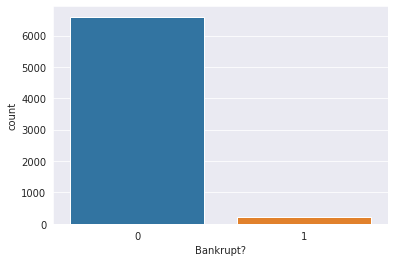

In [ ]:
sns.countplot(x ='Bankrupt?', data = df)

plt.show()

## Splitting into Test and Train

In [ ]:
y = df['Bankrupt?']
X = df.drop(['Bankrupt?'], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
my_model = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9695


### SHAP

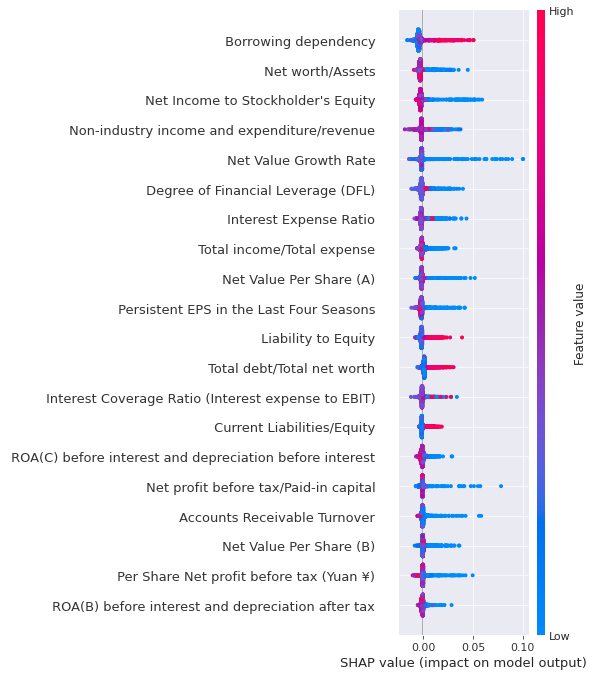

In [ ]:
explainer = shap.TreeExplainer(my_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test)

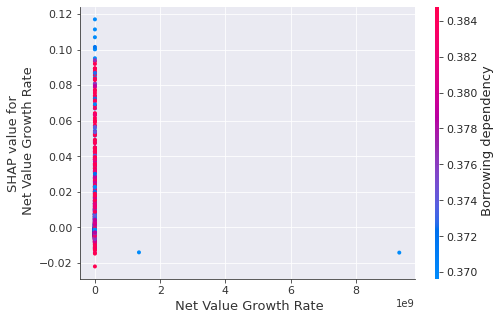

In [ ]:
import shap  
explainer = shap.TreeExplainer(my_model)

shap_values = explainer.shap_values(X)
shap.dependence_plot(' Net Value Growth Rate', shap_values[1], X, interaction_index=' Borrowing dependency')

In [ ]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

 Net Value Growth Rate                      0.030073
 Borrowing dependency                       0.026105
 Net Income to Stockholder's Equity         0.025545
 Net Value Per Share (A)                    0.024331
 Persistent EPS in the Last Four Seasons    0.023498
                                              ...   
 Realized Sales Gross Profit Growth Rate    0.005263
 Long-term Liability to Current Assets      0.005106
 Tax rate (A)                               0.003488
 Liability-Assets Flag                      0.000062
 Net Income Flag                            0.000000
Length: 95, dtype: float64

In [ ]:
data = pd.DataFrame(feature_scores)
data['index'] = data.index
data.rename(columns = {0:'value'}, inplace = True)
data.reset_index(drop=True, inplace=True)
top25 = data['index'].head(25).values.tolist()
top25

[' Net Value Growth Rate',
 ' Borrowing dependency',
 " Net Income to Stockholder's Equity",
 ' Net Value Per Share (A)',
 ' Persistent EPS in the Last Four Seasons',
 ' Degree of Financial Leverage (DFL)',
 ' Interest Expense Ratio',
 ' Non-industry income and expenditure/revenue',
 ' Total debt/Total net worth',
 ' Net Value Per Share (B)',
 ' Net worth/Assets',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Interest-bearing debt interest rate',
 ' Cash/Total Assets',
 ' Net Income to Total Assets',
 ' Interest Coverage Ratio (Interest expense to EBIT)',
 ' After-tax net Interest Rate',
 ' Debt ratio %',
 ' Total income/Total expense',
 ' Inventory/Working Capital',
 ' Cash/Current Liability',
 ' Net profit before tax/Paid-in capital',
 ' Fixed Assets Turnover Frequency',
 ' ROA(B) before interest and depreciation after tax',
 ' Liability to Equity']

### Bar Plots

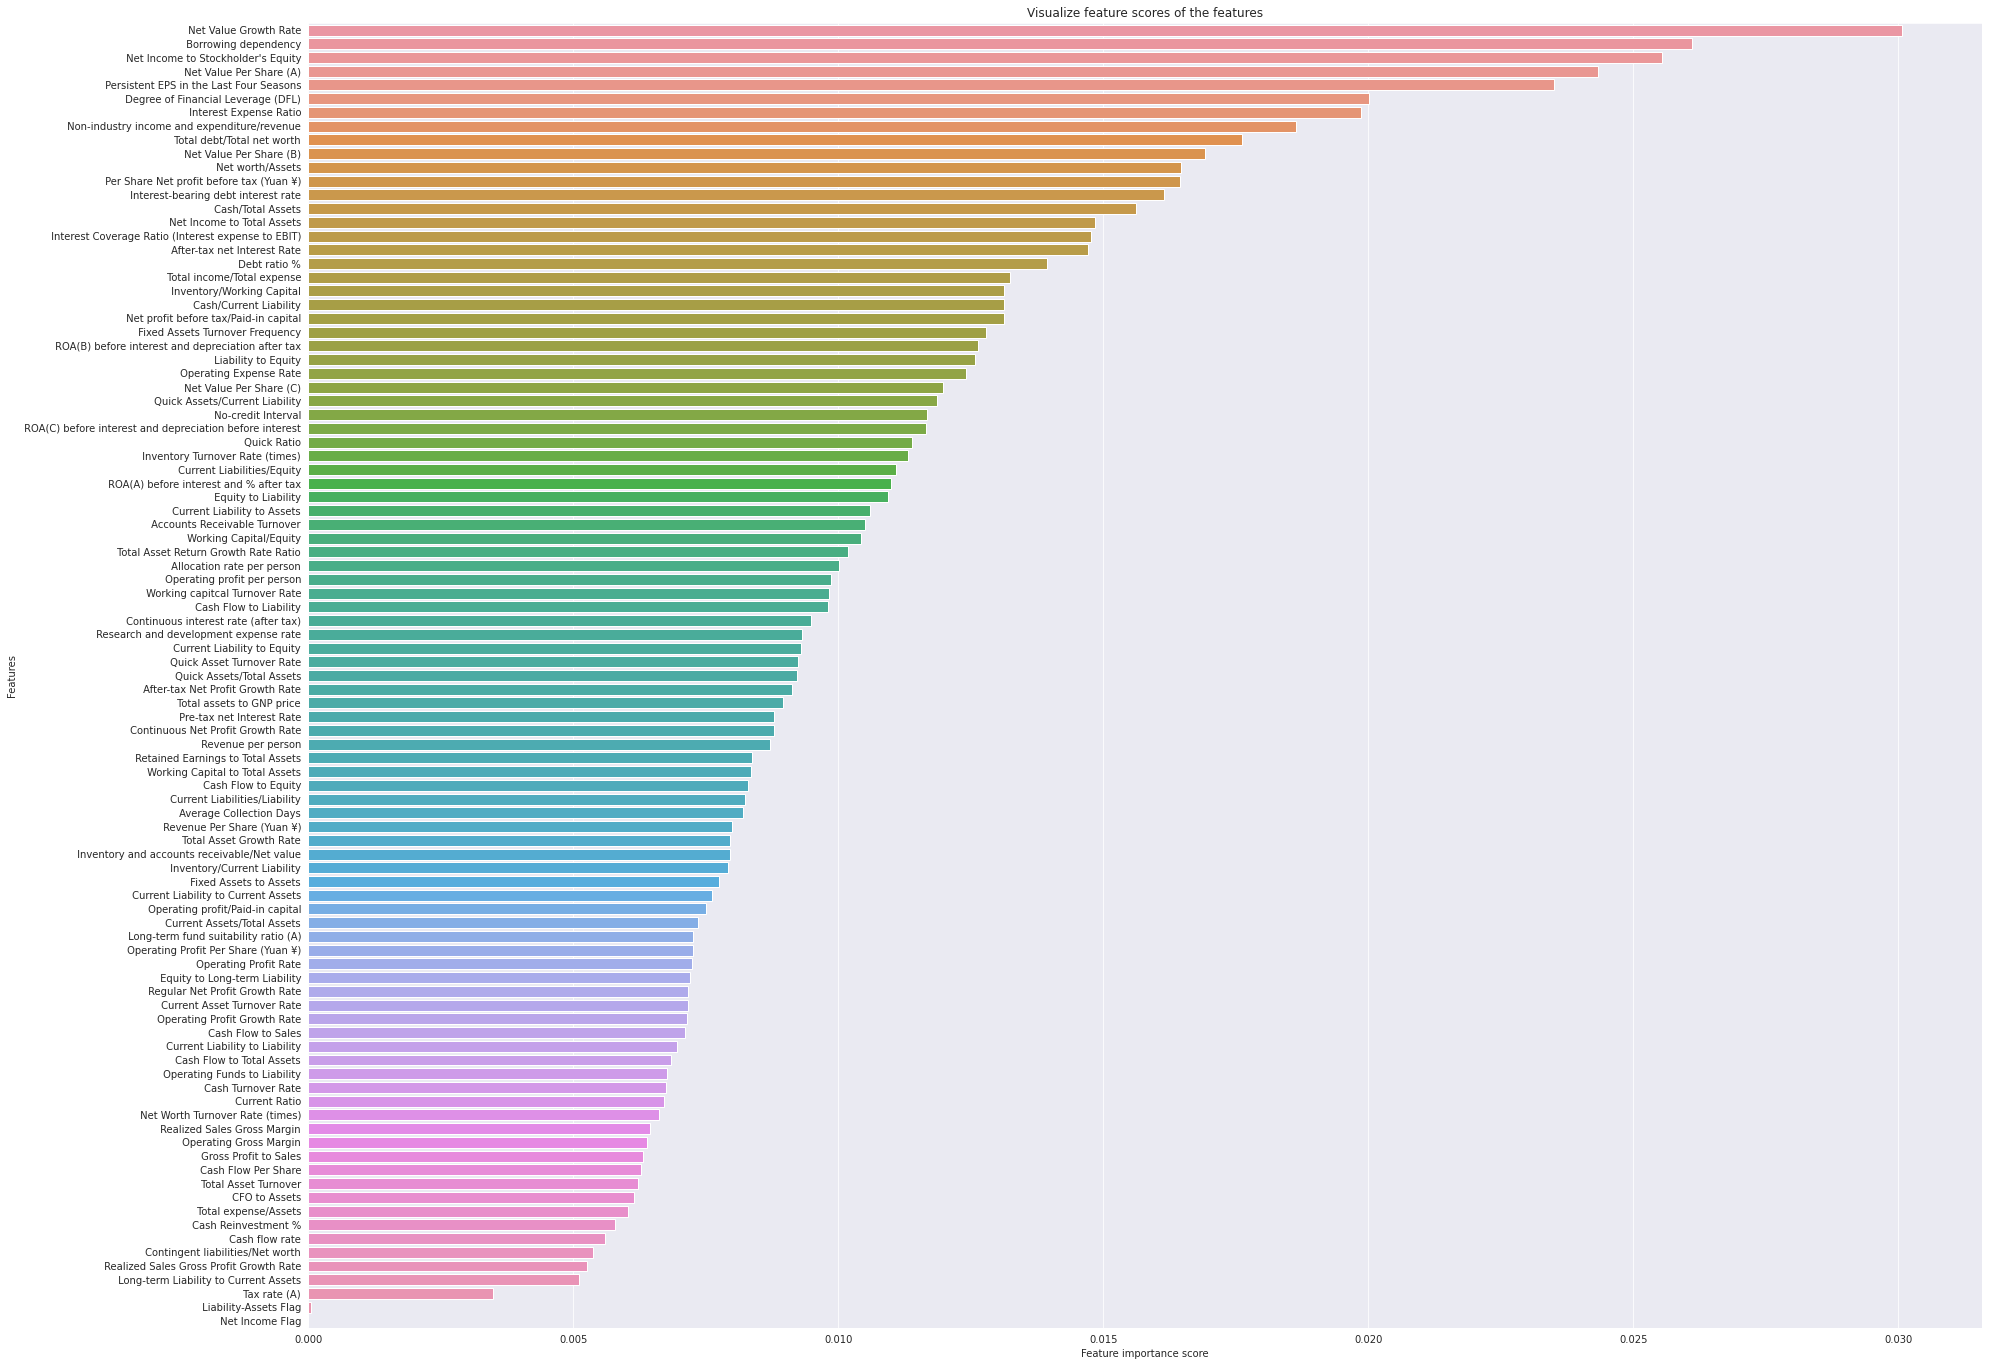

In [ ]:
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x='value', y='index', data=data)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")

plt.show()

In [ ]:
top25

[' Net Value Growth Rate',
 ' Borrowing dependency',
 " Net Income to Stockholder's Equity",
 ' Net Value Per Share (A)',
 ' Persistent EPS in the Last Four Seasons',
 ' Degree of Financial Leverage (DFL)',
 ' Interest Expense Ratio',
 ' Non-industry income and expenditure/revenue',
 ' Total debt/Total net worth',
 ' Net Value Per Share (B)',
 ' Net worth/Assets',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Interest-bearing debt interest rate',
 ' Cash/Total Assets',
 ' Net Income to Total Assets',
 ' Interest Coverage Ratio (Interest expense to EBIT)',
 ' After-tax net Interest Rate',
 ' Debt ratio %',
 ' Total income/Total expense',
 ' Inventory/Working Capital',
 ' Cash/Current Liability',
 ' Net profit before tax/Paid-in capital',
 ' Fixed Assets Turnover Frequency',
 ' ROA(B) before interest and depreciation after tax',
 ' Liability to Equity']

### Scatter Plots

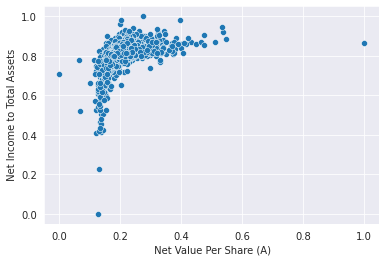

In [ ]:
sns.scatterplot(x =' Net Value Per Share (A)',
             y =' Net Income to Total Assets',
             data = df[top25])

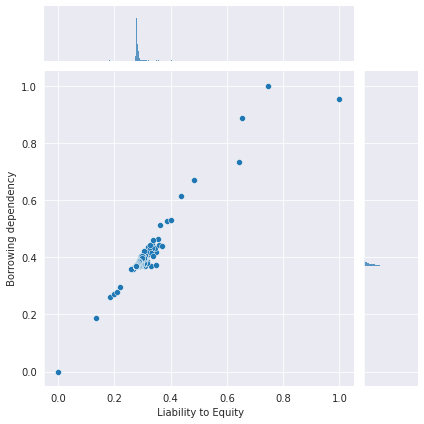

In [ ]:
sns.jointplot(x=' Liability to Equity', y=' Borrowing dependency', data=df[top25])

### Correlation Matrix

In [ ]:
df[top25].corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Net Value Growth Rate,Borrowing dependency,Net Income to Stockholder's Equity,Net Value Per Share (A),Persistent EPS in the Last Four Seasons,Degree of Financial Leverage (DFL),Interest Expense Ratio,Non-industry income and expenditure/revenue,Total debt/Total net worth,Net Value Per Share (B),Net worth/Assets,Per Share Net profit before tax (Yuan ¥),Interest-bearing debt interest rate,Cash/Total Assets,Net Income to Total Assets,Interest Coverage Ratio (Interest expense to EBIT),After-tax net Interest Rate,Debt ratio %,Total income/Total expense,Inventory/Working Capital,Cash/Current Liability,Net profit before tax/Paid-in capital,Fixed Assets Turnover Frequency,ROA(B) before interest and depreciation after tax,Liability to Equity
Net Value Growth Rate,1.0,-0.07794,0.06805,-0.03009,-0.0221,-0.0006972,-0.0006502,-0.001505,-0.0003598,-0.03018,-0.05651,-0.03763,0.01361,-0.01048,-0.07241,-0.0004458,-0.0008578,0.05651,-0.0007095,-0.0005517,-0.0009991,-0.03836,0.036,-0.02613,-0.06865
Borrowing dependency,-0.07794,1.0,-0.8065,-0.1253,-0.1441,0.00726,0.007844,-0.01204,-0.00808,-0.124,-0.3291,-0.1421,-0.001729,-0.1264,-0.1778,0.001776,-0.004395,0.3291,-0.007016,0.003151,0.04109,-0.1349,0.02523,-0.1586,0.9559
Net Income to Stockholder's Equity,0.06805,-0.8065,1.0,0.1489,0.223,-9.303e-05,0.003604,0.007693,-0.0007004,0.1487,0.124,0.2184,0.01095,0.04507,0.3285,0.005147,0.01065,-0.124,0.006213,0.0001764,-0.008188,0.2157,-0.0136,0.2806,-0.7918
Net Value Per Share (A),-0.03009,-0.1253,0.1489,1.0,0.7554,-0.02178,-0.008085,0.01964,0.008547,0.9993,0.2499,0.726,0.05035,0.1856,0.4938,-0.002358,0.03135,-0.2499,0.02314,-0.005589,-0.03276,0.7058,-0.08177,0.502,-0.1118
Persistent EPS in the Last Four Seasons,-0.0221,-0.1441,0.223,0.7554,1.0,-0.01883,6.695e-06,0.01815,-0.01138,0.7556,0.1774,0.9556,0.05951,0.241,0.6912,0.008039,0.03077,-0.1774,0.02301,0.0002826,-0.0344,0.9595,-0.1295,0.7646,-0.1141
Degree of Financial Leverage (DFL),-0.0006972,0.00726,-9.303e-05,-0.02178,-0.01883,1.0,0.01683,-0.0005562,-0.001262,-0.02186,-0.01798,-0.01788,-0.007301,-0.02429,-0.01046,0.01651,0.0009271,0.01798,-0.001156,0.002294,0.001636,-0.01836,0.01856,-0.01466,0.002119
Interest Expense Ratio,-0.0006502,0.007844,0.003604,-0.008085,6.695e-06,0.01683,1.0,0.0004648,-0.0007967,-0.008175,-0.0232,-0.001111,-0.00436,-0.01743,0.004969,-0.03432,0.001612,0.0232,-0.0004297,0.00415,0.01063,-0.001346,0.02594,0.005187,0.006926
Non-industry income and expenditure/revenue,-0.001505,-0.01204,0.007693,0.01964,0.01815,-0.0005562,0.0004648,1.0,-0.0002837,0.01959,0.03321,0.01928,0.001332,0.009002,0.02842,0.001024,-0.1152,-0.03321,0.001701,0.02311,-0.00356,0.01948,-0.00554,0.02237,-0.0119
Total debt/Total net worth,-0.0003598,-0.00808,-0.0007004,0.008547,-0.01138,-0.001262,-0.0007967,-0.0002837,1.0,0.008546,0.05405,-0.008518,-0.003984,0.01968,-0.008056,-0.0004314,-0.001379,-0.05405,-0.0007248,-0.0005739,-0.00191,-0.008575,0.01606,-0.02116,-0.01004
Net Value Per Share (B),-0.03018,-0.124,0.1487,0.9993,0.7556,-0.02186,-0.008175,0.01959,0.008546,1.0,0.2491,0.7263,0.05035,0.1856,0.4938,-0.002175,0.03137,-0.2491,0.02314,-0.005685,-0.03308,0.7066,-0.08097,0.5021,-0.1109


**Interpretation - Confusion Matrix**

We can see that there is no strong correlation between variables.

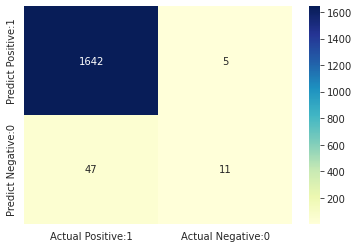

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
#columns to comsider
cols = [' Net Value Growth Rate',
 ' Borrowing dependency',
 " Net Income to Stockholder's Equity",
 ' Net Value Per Share (A)',
 ' Persistent EPS in the Last Four Seasons',
 ' Degree of Financial Leverage (DFL)',
 ' Interest Expense Ratio',
 ' Non-industry income and expenditure/revenue',
 ' Total debt/Total net worth',
 ' Net Value Per Share (B)',
 ' Net worth/Assets',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Interest-bearing debt interest rate',
 ' Cash/Total Assets',
 ' Net Income to Total Assets',
 ' Interest Coverage Ratio (Interest expense to EBIT)',
 ' After-tax net Interest Rate',
 ' Debt ratio %',
 ' Total income/Total expense',
 ' Inventory/Working Capital',
 ' Cash/Current Liability',
 ' Net profit before tax/Paid-in capital',
 ' Fixed Assets Turnover Frequency',
 ' ROA(B) before interest and depreciation after tax',
 ' Liability to Equity']

In [ ]:
X = df[[i for i in cols]]
y = df['Bankrupt?']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Creating empty dictionary to store the scores for the evaluation of models

model_scores = {}

In [ ]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train,y_train)
model_scores["KNN"] = model_KNN.score(X_test,y_test)


In [ ]:
model_SVM = svm.LinearSVC()
model_SVM.fit(X_train,y_train)
model_scores["Supoort_Vector_Machine"] = model_SVM.score(X_test,y_test)

In [ ]:
model_LR = LogisticRegression()
model_LR.fit(X_train,y_train)
model_scores["Logistic_Rregression"] = model_LR.score(X_test,y_test)


In [ ]:
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train,y_train)
model_scores["XGB"] = model_xgb.score(X_test,y_test)

In [ ]:
model_RFC = RandomForestClassifier(n_estimators = 100)
model_RFC.fit(X_train,y_train)
model_scores["RFC"] = model_RFC.score(X_test,y_test)


In [ ]:
model_scores

{'KNN': 0.9636363636363636,
 'Supoort_Vector_Machine': 0.9624633431085043,
 'Logistic_Rregression': 0.9659824046920821,
 'XGB': 0.9689149560117302,
 'RFC': 0.9700879765395894}

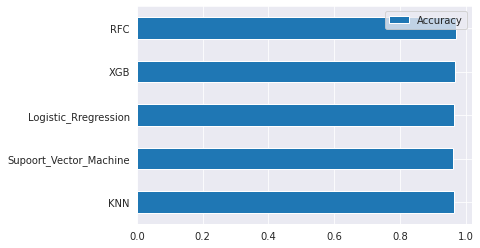

In [ ]:
# Accuracy Comparison between differernt models

model_compare = pd.DataFrame(model_scores, index=['Accuracy'])
model_compare.T.plot.barh();

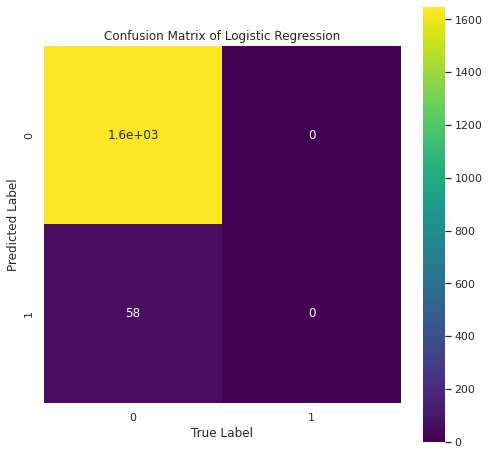

In [ ]:
# Plotting Confusion Matrix
sns.set(font_scale=1.0)
def plot_conf_mat(y_test, model,name = "null"):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    y_preds = model.predict(X_test)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=True,

                    square = True,
                    cmap = 'viridis',
                    )
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    plt.title(f"Confusion Matrix of {name}")
    
plot_conf_mat(y_test, model_LR,"Logistic Regression")

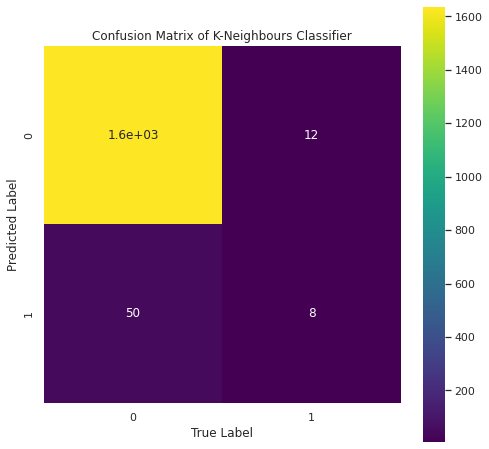

In [ ]:
plot_conf_mat(y_test,model_KNN,"K-Neighbours Classifier")

(None, None)

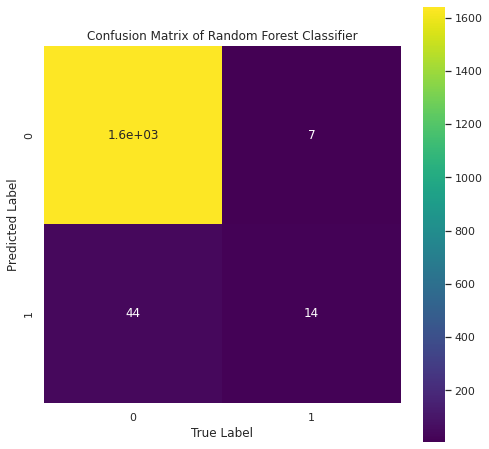

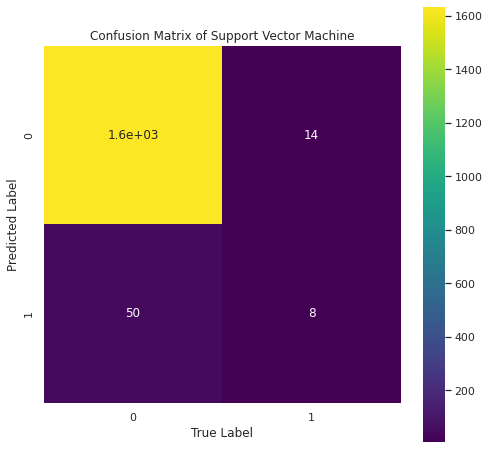

In [ ]:
plot_conf_mat(y_test,model_RFC,"Random Forest Classifier"),plot_conf_mat(y_test,model_SVM,"Support Vector Machine")

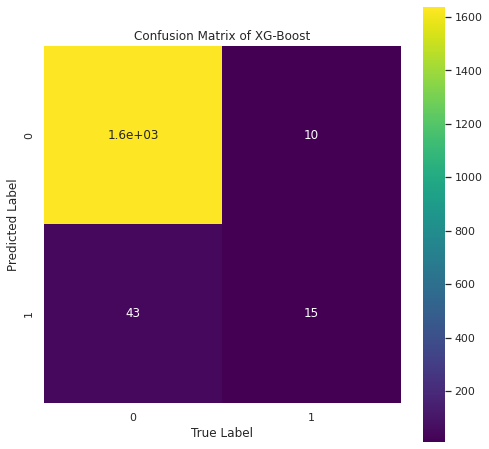

In [ ]:
plot_conf_mat(y_test,model = model_xgb,name = "XG-Boost")

In [ ]:
def cls_report(y_test,model,name):
    y_preds = model.predict(X_test)
    print(f"\t\t\t{name}\n")
    print(classification_report(y_test, y_preds))
    print("_"*55,end = "\n\n")
    
cls_report(y_test, model_RFC,"Random Forest Classifier")
cls_report(y_test,model_KNN,"K-Neighbours Classifier")
cls_report(y_test,model_SVM,"Support Vector Machine")
cls_report(y_test,model_LR,"Logistic Regression")
cls_report(y_test,model_xgb,"XG Boost")


			Random Forest Classifier

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1647
           1       0.67      0.24      0.35        58

    accuracy                           0.97      1705
   macro avg       0.82      0.62      0.67      1705
weighted avg       0.96      0.97      0.96      1705

_______________________________________________________

			K-Neighbours Classifier

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1647
           1       0.40      0.14      0.21        58

    accuracy                           0.96      1705
   macro avg       0.69      0.57      0.59      1705
weighted avg       0.95      0.96      0.95      1705

_______________________________________________________

			Support Vector Machine

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1647
           1       0.36      0.14      